<a href="https://colab.research.google.com/github/ArunK-ML/Learn----Statsmodels-statistical-modeling-and-hypothesis-testing-/blob/main/StatsModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taking Sample Data**

In [2]:
import pandas as pd
df = pd.read_csv("/content/slr (Sample Data).csv")
df

,Exam,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [3]:
x1 = df["Exam"]
y = df["GPA"]

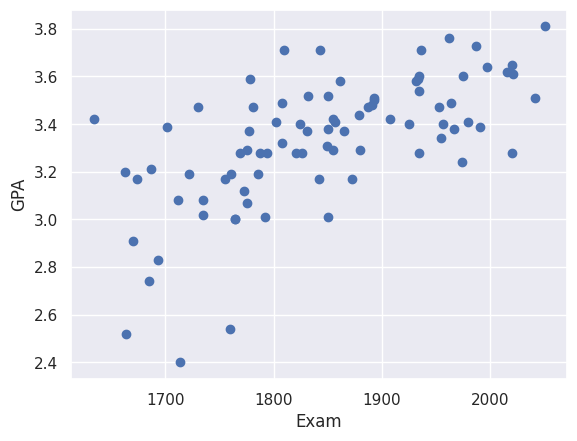

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.xlabel("Exam")
plt.ylabel("GPA")
plt.scatter(x1,y)
plt.show()

# **StatsModels**

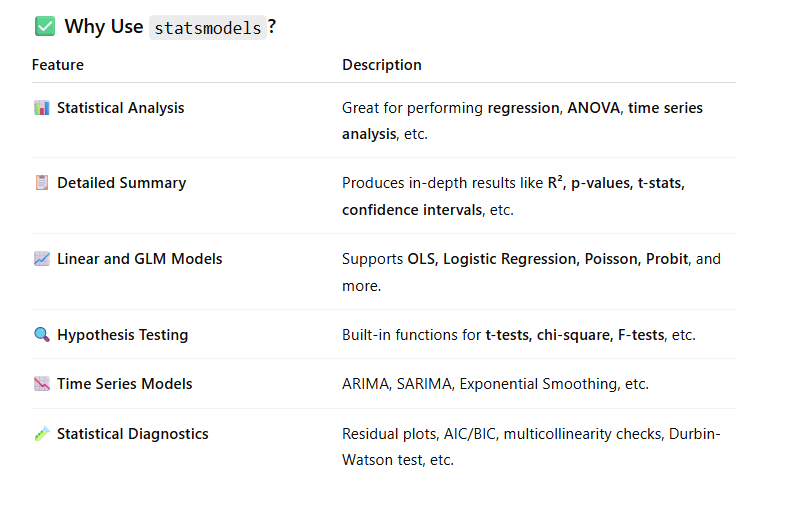

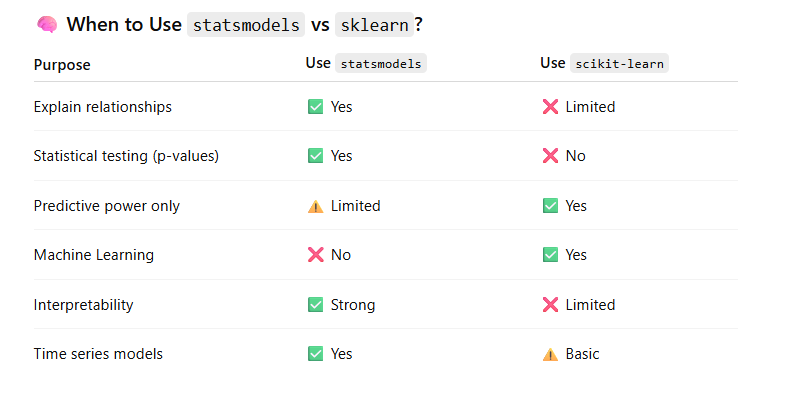

# **API Reference**

In [5]:
# Package

import statsmodels.api as sm

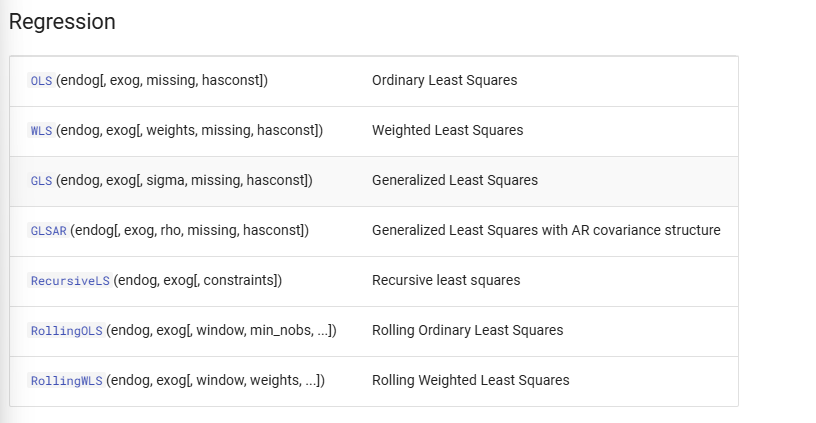

In statsmodels, regression is used to model the relationship between **dependent (Y)** and **independent (X)** variables, just like in scikit-learn — but with **detailed statistical output** like:

**p-values**

**R-squared**

**Confidence intervals**

**F-statistics**

And more...



**What is Regression? — Simple Explanation**

**Regression** is a **supervised machine learning technique** used to **predict a continuous value** (like price, salary, score, temperature) based on input variables.

🎯 **Purpose of Regression**

---> Find the **relationship** between **independent variables (X)** and a **dependent variable (Y)**

---> **Predict values** of Y based on new inputs X

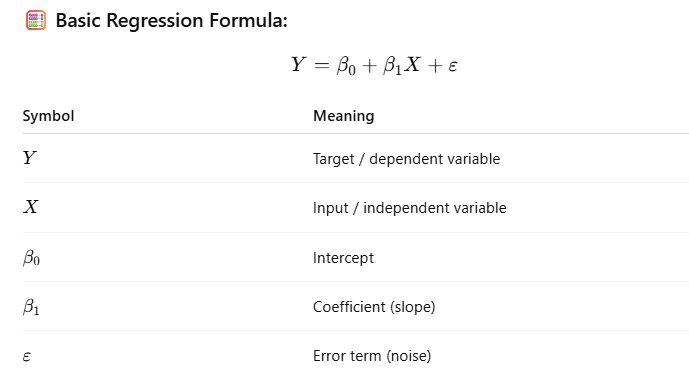

In [6]:
# We add a constant to include the intercept (β₀) in the regression equation.

x=sm.add_constant(x1)
x

,const,Exam
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [7]:
# Model Trans by using OLS

model = sm.OLS(y,x).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           7.20e-11
Time:                        09:51:53   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
Exam           0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
0.2750+(0.0017*1750)

3.2499999999999996

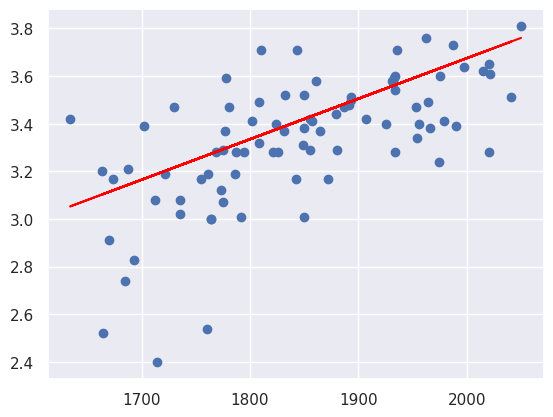

In [10]:
beta0 = 0.2750    # intercept
beta1 = 0.0017    # Slope

yhat = beta0 + (beta1*x1)

plt.scatter(x1,y)
plt.plot(x1,yhat,color="red")
plt.show()

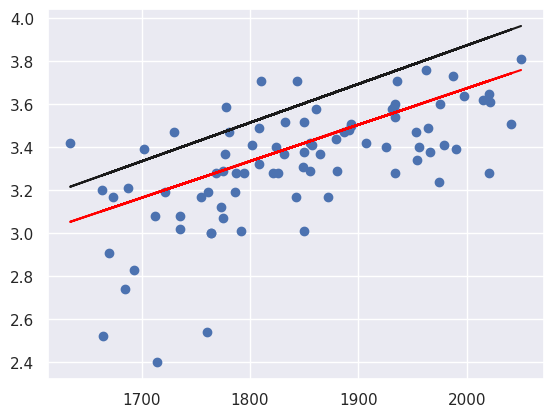

In [13]:
beta0 = 0.2750    # intercept
beta1 = 0.0018    # Slope

yhat1 = beta0 + (beta1*x1)

plt.scatter(x1,y)
plt.plot(x1,yhat,color="red")
plt.plot(x1,yhat1,color="k")
plt.show()

In [15]:
model.params[0], model.params[1]

/tmp/ipython-input-2944435763.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model.params[0], model.params[1]


(np.float64(0.27504029966028876), np.float64(0.0016556880500928112))

/tmp/ipython-input-234247602.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat_original = model.params[0] + (model.params[1] * x1)


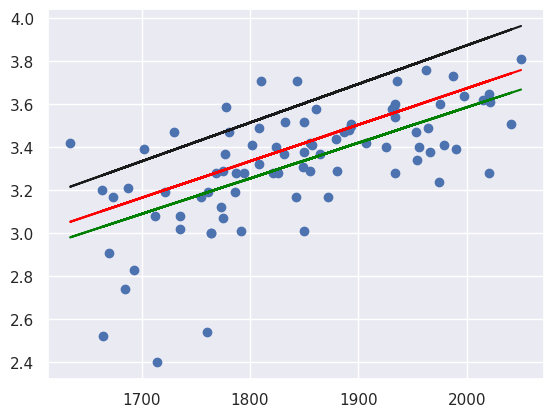

In [17]:
yhat_original = model.params[0] + (model.params[1] * x1)

plt.scatter(x1,y)
plt.plot(x1,yhat,color="red")
plt.plot(x1,yhat1,color="k")
plt.plot(x1,yhat_original,color="green")
plt.show()

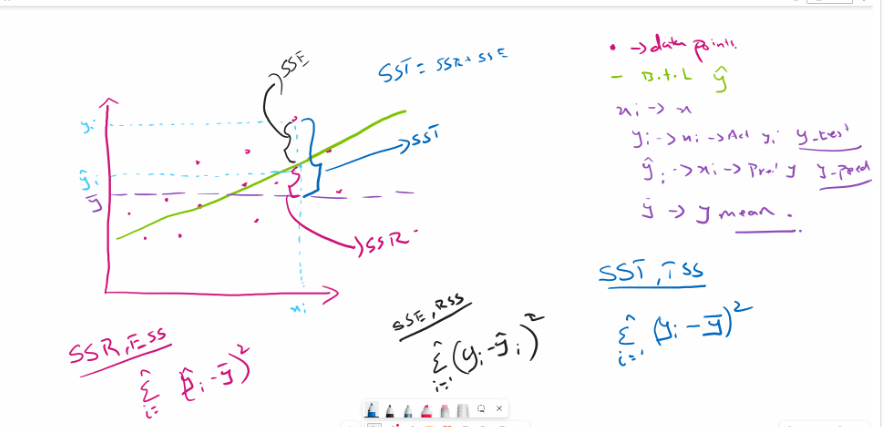

In [ ]:
# SST/TSS - Sum of squares of Total / Total Sum of Squares:
# ------------------------------
# 1. The difference between the actual point and the mean(average) point.
# 2. We are squaring the result to avoid the negative result.
# 3. To measure the total variability of the data set. (Mathematician perspective)


# SSR/ESS - Sum of Squares of Regression / Explained Sum of Squares:
# ---------------------------------------------------------------------
# 1. The difference between the predicted and the mean.
# 2. To measure the explained variability based on the line(best fit line) (Mathematician perspective)


# SSE/RSS - Sum of Squares of Error / Residual Sum of Squares / Remaining Sum of Squares:
# --------------------------------------------------------------------------
# 1. The difference between the actual and the predicted point.
# 2. To measure the unexplained variability by the equation. (Mathematician perspective)


# # **SST = SSR + SSE**
# - If SSE is too low then it is advisable (more accuracy toward the actual and predict)
#- If SSE is too high then it is not advisable (less accuracy toward the actual and predict)
# - If actual and predictor are same then SSE is zero (theoritically)


# **SST / TSS in Regression**

**SST** or **TSS** stands for **Total Sum of Squares**.
It measures the **total variation** in the dependent variable (Y) from its mean.

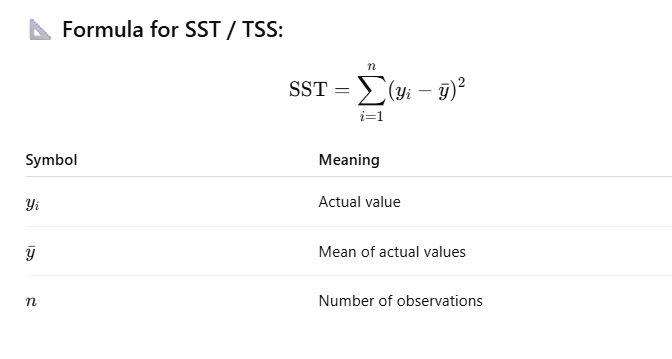

🎯 **Purpose of SST**

* SST tells you **how much variation** exists in your dependent variable **before** fitting the model.

* It acts as the **baseline** to compare how much variation is explained by the regression.

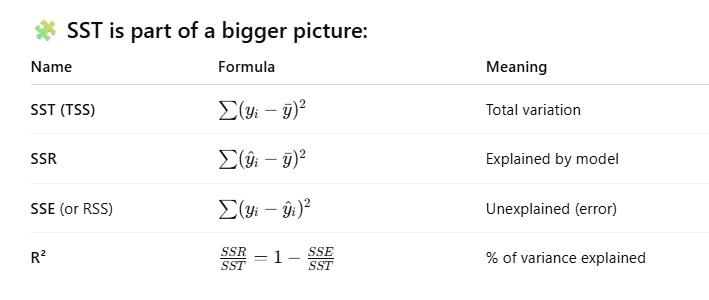

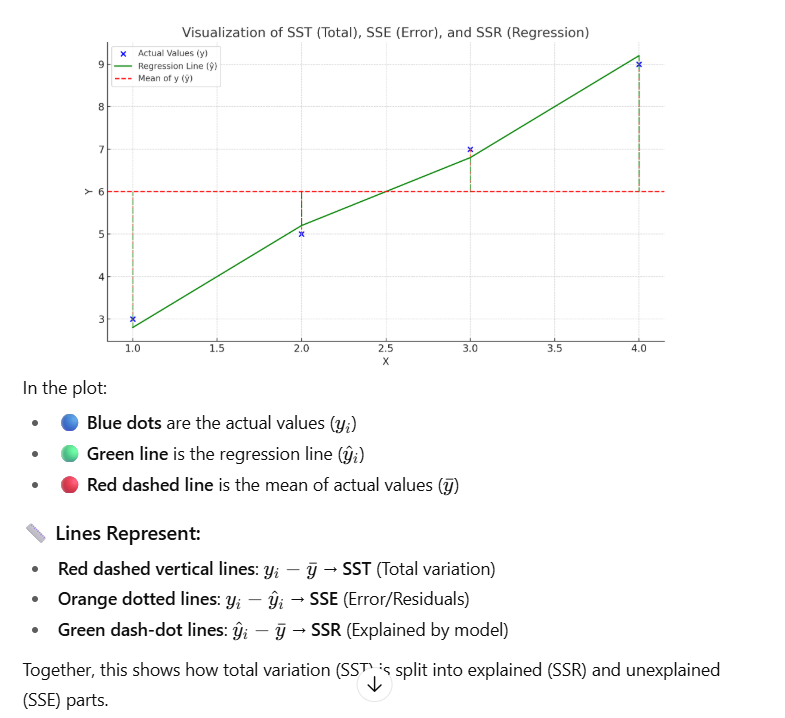

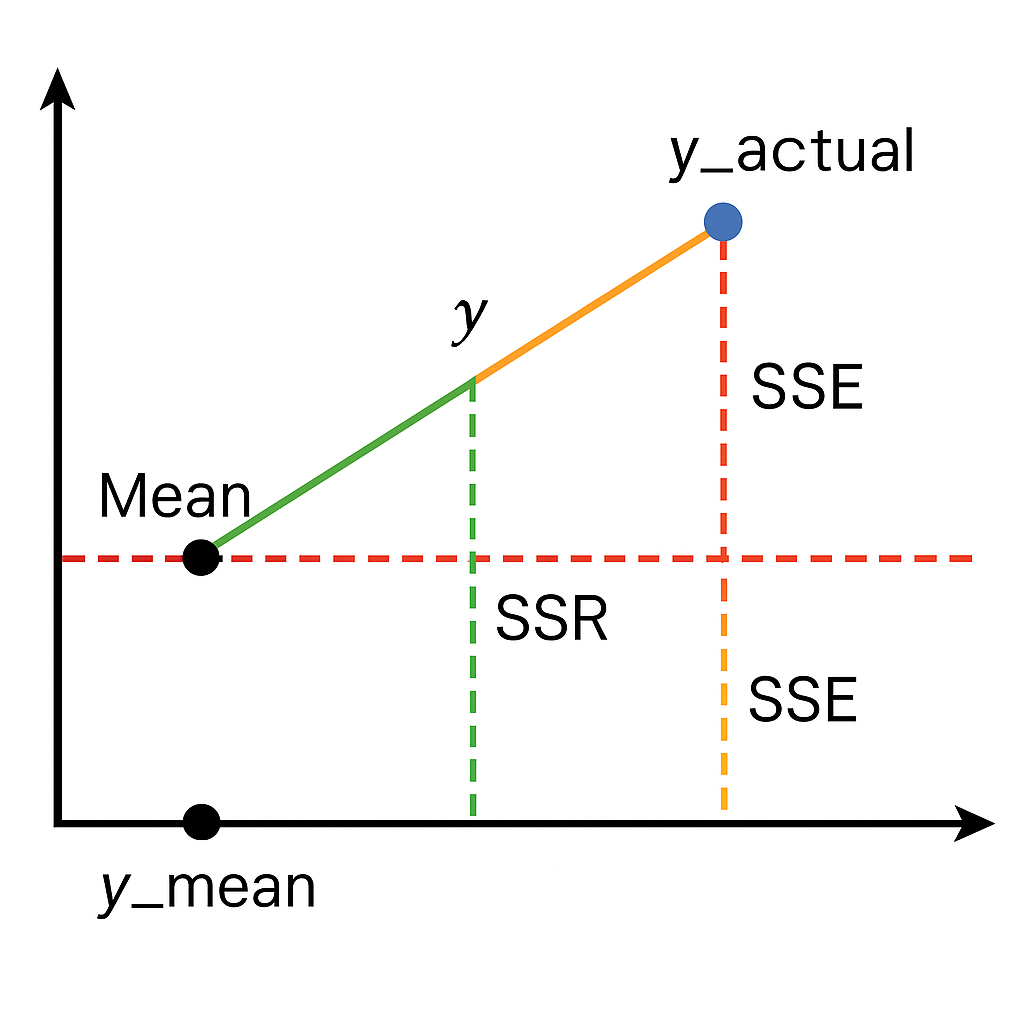

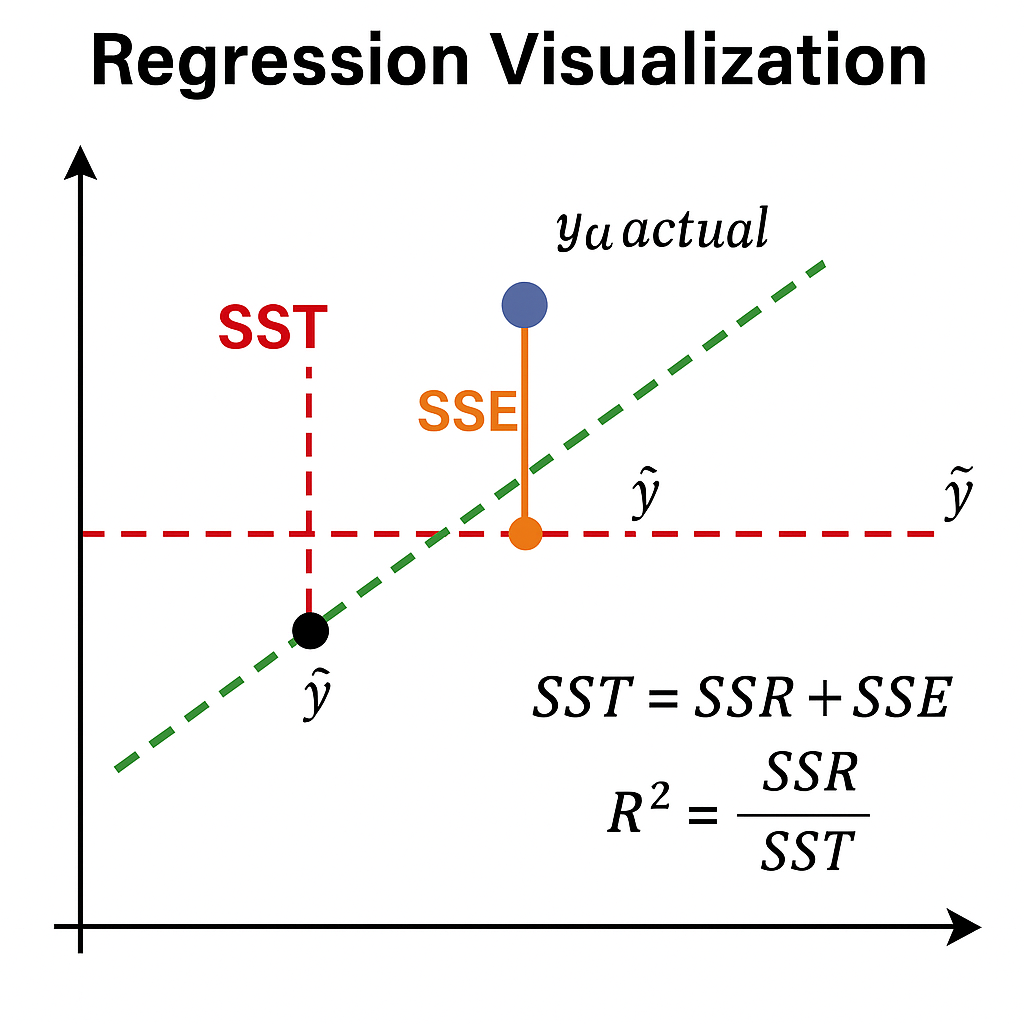

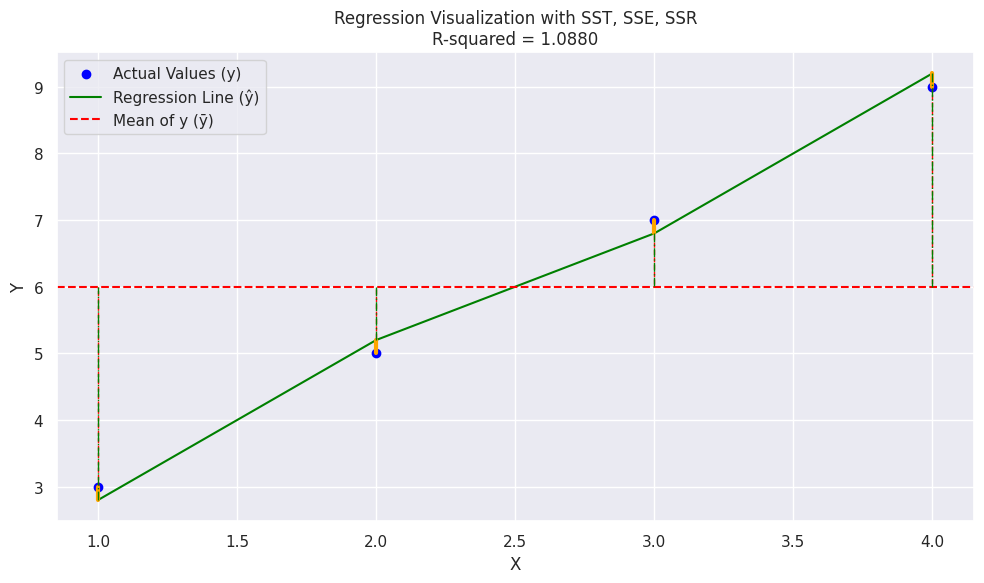

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.array([1, 2, 3, 4])
y_actual = np.array([3, 5, 7, 9])
y_predicted = np.array([2.8, 5.2, 6.8, 9.2])
y_mean = np.mean(y_actual)

# Calculate SST, SSR, SSE
sst = np.sum((y_actual - y_mean) ** 2)
ssr = np.sum((y_predicted - y_mean) ** 2)
sse = np.sum((y_actual - y_predicted) ** 2)
r_squared = ssr / sst

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y_actual, color='blue', label='Actual Values (y)')
plt.plot(x, y_predicted, color='green', label='Regression Line (ŷ)')
plt.axhline(y=y_mean, color='red', linestyle='--', label='Mean of y (ȳ)')

# SST (Total Variation): y - mean
for xi, yi in zip(x, y_actual):
    plt.plot([xi, xi], [yi, y_mean], color='red', linestyle='--', linewidth=1)

# SSE (Error): y - ŷ — orange, thick
for xi, yi, yhat in zip(x, y_actual, y_predicted):
    plt.plot([xi, xi], [yi, yhat], color='orange', linestyle='-', linewidth=3)

# SSR (Explained): ŷ - mean
for xi, yhat in zip(x, y_predicted):
    plt.plot([xi, xi], [yhat, y_mean], color='green', linestyle='-.', linewidth=1)

# Title and labels
plt.title(f"Regression Visualization with SST, SSE, SSR\nR-squared = {r_squared:.4f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
